## 패키지 인스톨

In [ ]:
!pip3 install --upgrade pip
!pip3 install seqeval demoji kiwipiepy pororo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 5.1 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.1/256.1 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 38.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 748.8/748.8 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## 데이터 로드 및 학습 & 테스트 데이터 생성

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import ast
import demoji
import json
import tensorflow as tf

pd.set_option('display.min_rows', 100)
pd.set_option('display.max_columns', 100)

ModuleNotFoundError: ignored

In [ ]:
result_df = pd.read_csv("/content/drive/MyDrive/DATA/cp2/result_train_data_ner.v5.csv")
result_df = result_df[(result_df['labels'].notna())]
result_df

,channel_name_x,sender_nickname,message,message_noun_idx,message_v2,id type,labels
0,김위칭,위칭,으어 오늘도 재밌엉ㅎ습니다,[1],으어 오늘 도 재밌 엉 ㅎ 습니다,celeb,"['O', 'DATE', 'O', 'O', 'O', 'O', 'O']"
1,김위칭,위칭,요즘 계속 업뎃중이라 토큰이 자꾸 만료되네요ㅋㅋ,"[0, 2, 3, 6, 9]",요즘 계속 업뎃 중 이 라 토큰 이 자꾸 만료 되 네요 ㅋㅋ,celeb,"['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
2,김위칭,위칭,다들 맛난거 드시네요,"[4, 5]",다 들 맛나 ᆫ 거 들 시 네요,celeb,"['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']"
3,김위칭,위칭,위칭이도 먹고시푼데,"[0, 3, 5, 6, 8]",위칭 이 도 먹 고 시 풀 ᆫ 데,celeb,"['O', 'O', 'O', 'O', 'O', 'CIVILIZATION', 'O',..."
4,김위칭,위칭,와 좀 압도적,[2],와 좀 압도 적,celeb,"['O', 'O', 'O', 'O']"
5,김위칭,위칭,이딴걸 먹으라니,"[2, 4]",이 딴 거 ᆯ 먹 으라 니,celeb,"['O', 'O', 'O', 'O', 'O', 'O', 'O']"
6,김위칭,위칭,뀨,[0],뀨,celeb,['O']
7,김위칭,위칭,헐 전 콘치 좋은디,"[1, 3]",헐 저 ᆫ 콘치 좋 은디,celeb,"['O', 'O', 'O', 'O', 'O', 'PERSON']"
8,김위칭,위칭,볼통통이,[0],볼 통통 이,celeb,"['ANIMAL', 'O', 'O']"
9,김위칭,위칭,윽 화장품때문에 얼굴다뒤집ㅜㅜ 속상쓰에요,"[1, 2, 4, 8, 10]",윽 화장품 때문 에 얼굴 다 뒤집 ㅜㅜ 속 상 쓰 에요,celeb,"['O', 'O', 'O', 'O', 'ANIMAL', 'O', 'O', 'O', ..."


In [ ]:
result_df['labels'] = result_df['labels'].apply(lambda x: ast.literal_eval(x))

result_df['len_message'] = result_df['message_v2'].apply(lambda x: len(x.split()))
result_df['len_labels'] = result_df['labels'].apply(lambda x: len(x))

In [ ]:
result_df['is_equal'] = result_df.apply(lambda x:1 if x['len_message'] == x['len_labels'] else 0, axis=1)
result_df['is_equal'].value_counts()

# result_df
# result_df.info()

1    356513
0     72238
Name: is_equal, dtype: int64

In [ ]:
result_df = result_df[(result_df['is_equal'] == 1)]
result_df

,channel_name_x,sender_nickname,message,message_noun_idx,message_v2,id type,labels,len_message,len_labels,is_equal
0,김위칭,위칭,으어 오늘도 재밌엉ㅎ습니다,[1],으어 오늘 도 재밌 엉 ㅎ 습니다,celeb,"[O, DATE, O, O, O, O, O]",7,7,1
1,김위칭,위칭,요즘 계속 업뎃중이라 토큰이 자꾸 만료되네요ㅋㅋ,"[0, 2, 3, 6, 9]",요즘 계속 업뎃 중 이 라 토큰 이 자꾸 만료 되 네요 ㅋㅋ,celeb,"[O, O, O, O, O, O, O, O, O, O, O, O, O]",13,13,1
2,김위칭,위칭,다들 맛난거 드시네요,"[4, 5]",다 들 맛나 ᆫ 거 들 시 네요,celeb,"[O, O, O, O, O, O, O, O]",8,8,1
3,김위칭,위칭,위칭이도 먹고시푼데,"[0, 3, 5, 6, 8]",위칭 이 도 먹 고 시 풀 ᆫ 데,celeb,"[O, O, O, O, O, CIVILIZATION, O, O, O]",9,9,1
4,김위칭,위칭,와 좀 압도적,[2],와 좀 압도 적,celeb,"[O, O, O, O]",4,4,1
5,김위칭,위칭,이딴걸 먹으라니,"[2, 4]",이 딴 거 ᆯ 먹 으라 니,celeb,"[O, O, O, O, O, O, O]",7,7,1
6,김위칭,위칭,뀨,[0],뀨,celeb,[O],1,1,1
7,김위칭,위칭,헐 전 콘치 좋은디,"[1, 3]",헐 저 ᆫ 콘치 좋 은디,celeb,"[O, O, O, O, O, PERSON]",6,6,1
8,김위칭,위칭,볼통통이,[0],볼 통통 이,celeb,"[ANIMAL, O, O]",3,3,1
9,김위칭,위칭,윽 화장품때문에 얼굴다뒤집ㅜㅜ 속상쓰에요,"[1, 2, 4, 8, 10]",윽 화장품 때문 에 얼굴 다 뒤집 ㅜㅜ 속 상 쓰 에요,celeb,"[O, O, O, O, ANIMAL, O, O, O, O, O, O, O]",12,12,1


In [ ]:
sentences_list = result_df['message_v2'].tolist()
sentences_list

['으어 오늘 도 재밌 엉 ㅎ 습니다',
 '요즘 계속 업뎃 중 이 라 토큰 이 자꾸 만료 되 네요 ㅋㅋ',
 '다 들 맛나 ᆫ 거 들 시 네요',
 '위칭 이 도 먹 고 시 풀 ᆫ 데',
 '와 좀 압도 적',
 '이 딴 거 ᆯ 먹 으라 니',
 '뀨',
 '헐 저 ᆫ 콘치 좋 은디',
 '볼 통통 이',
 '윽 화장품 때문 에 얼굴 다 뒤집 ㅜㅜ 속 상 쓰 에요',
 '우선 세수 하 어서 씻 어 내 었 어요 ㅜㅜ',
 '완전 박빙 이 네요 대선',
 '누구 가 되 ᆯ지 거참',
 '꿈 이 지만 둘 다 좋 은 사람 이 견해 만 다른 거 이 었 음 넘 좋 었 을 터 이 ᆫ데',
 '애긔마리',
 '엌',
 '축가 연습 가 는 길',
 '눈뜨 고 자 는 중',
 '위칭넴 고등학교 친구 결혼 함 요 ㅋㅋ',
 '오늘 휴방뱅 재밌 었 수 ᆸ니다',
 '역시 전 아이언 은 아니 ᆫ 듯 ^^',
 '온몸 이 찌뿌두둥',
 '근육 들 이 자기 어필 중',
 '이제 기차 이 ᆸ니다 오늘 사람 많 네요 포항 가 ᆯ 때 ᆫ 사람 없 었 는 데 ㅜ',
 '응 부산역 에서 셀카 찍 는 사람 나 뿐이 없 어',
 '칭구집도착쓰',
 '빵 떡 같 은디 요',
 '친구 거 먹 겠 습니다 ^^',
 '위칭 이 기침 하 면 에칭',
 '다둘굿밤 ^^',
 '국방부 에서 호스팅 하 ᆫ다 트수 또',
 '아이구 아니요 지금 많이 놀 세요',
 '엌 ㅋㅋㅋㅋ',
 '저 없 는 사이 트위치 에 아무 일 없 었 나요 새로 유행 하 ᆫ 게임 이라던가',
 '오타쿠어드벤쳐와 마작 이 유행 이 라',
 '오타쿠 어드벤쳐',
 '코로나 상비약 파워 콜 비추',
 '다 들 행복 한 금요일 밤 되라냥',
 '갸아아 누구 가 인형 이 람',
 '나 한테 딱 맞 다냥',
 '오늘 은 날 이 좋 군요 다 들 즐겁 은 화요일',
 '여친 이 요',
 '트수 가 그런 것 이 어딨 음 장난 ㄴㄴ',
 '와 트수가 여친 을 사귀 네 와 뭐 이것 이 다 위칭 방송 덕 이 기 ᆫ 하 어',
 '오 어 ㄷㄷ 이 거 ᆯ 못 보

In [ ]:
result_df['message_v2'] = result_df['message_v2'].apply(lambda x: x.split())
result_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,channel_name_x,sender_nickname,message,message_noun_idx,message_v2,id type,labels,len_message,len_labels,is_equal
0,김위칭,위칭,으어 오늘도 재밌엉ㅎ습니다,[1],"[으어, 오늘, 도, 재밌, 엉, ㅎ, 습니다]",celeb,"[O, DATE, O, O, O, O, O]",7,7,1
1,김위칭,위칭,요즘 계속 업뎃중이라 토큰이 자꾸 만료되네요ㅋㅋ,"[0, 2, 3, 6, 9]","[요즘, 계속, 업뎃, 중, 이, 라, 토큰, 이, 자꾸, 만료, 되, 네요, ㅋㅋ]",celeb,"[O, O, O, O, O, O, O, O, O, O, O, O, O]",13,13,1
2,김위칭,위칭,다들 맛난거 드시네요,"[4, 5]","[다, 들, 맛나, ᆫ, 거, 들, 시, 네요]",celeb,"[O, O, O, O, O, O, O, O]",8,8,1
3,김위칭,위칭,위칭이도 먹고시푼데,"[0, 3, 5, 6, 8]","[위칭, 이, 도, 먹, 고, 시, 풀, ᆫ, 데]",celeb,"[O, O, O, O, O, CIVILIZATION, O, O, O]",9,9,1
4,김위칭,위칭,와 좀 압도적,[2],"[와, 좀, 압도, 적]",celeb,"[O, O, O, O]",4,4,1
5,김위칭,위칭,이딴걸 먹으라니,"[2, 4]","[이, 딴, 거, ᆯ, 먹, 으라, 니]",celeb,"[O, O, O, O, O, O, O]",7,7,1
6,김위칭,위칭,뀨,[0],[뀨],celeb,[O],1,1,1
7,김위칭,위칭,헐 전 콘치 좋은디,"[1, 3]","[헐, 저, ᆫ, 콘치, 좋, 은디]",celeb,"[O, O, O, O, O, PERSON]",6,6,1
8,김위칭,위칭,볼통통이,[0],"[볼, 통통, 이]",celeb,"[ANIMAL, O, O]",3,3,1
9,김위칭,위칭,윽 화장품때문에 얼굴다뒤집ㅜㅜ 속상쓰에요,"[1, 2, 4, 8, 10]","[윽, 화장품, 때문, 에, 얼굴, 다, 뒤집, ㅜㅜ, 속, 상, 쓰, 에요]",celeb,"[O, O, O, O, ANIMAL, O, O, O, O, O, O, O]",12,12,1


In [ ]:
result_df = result_df[(result_df['message_v2'].notna()) & (result_df['labels'].notna())]

result_df.reset_index(drop=True, inplace=True)
result_df

,channel_name_x,sender_nickname,message,message_noun_idx,message_v2,id type,labels,len_message,len_labels,is_equal
0,김위칭,위칭,으어 오늘도 재밌엉ㅎ습니다,[1],"[으어, 오늘, 도, 재밌, 엉, ㅎ, 습니다]",celeb,"[O, DATE, O, O, O, O, O]",7,7,1
1,김위칭,위칭,요즘 계속 업뎃중이라 토큰이 자꾸 만료되네요ㅋㅋ,"[0, 2, 3, 6, 9]","[요즘, 계속, 업뎃, 중, 이, 라, 토큰, 이, 자꾸, 만료, 되, 네요, ㅋㅋ]",celeb,"[O, O, O, O, O, O, O, O, O, O, O, O, O]",13,13,1
2,김위칭,위칭,다들 맛난거 드시네요,"[4, 5]","[다, 들, 맛나, ᆫ, 거, 들, 시, 네요]",celeb,"[O, O, O, O, O, O, O, O]",8,8,1
3,김위칭,위칭,위칭이도 먹고시푼데,"[0, 3, 5, 6, 8]","[위칭, 이, 도, 먹, 고, 시, 풀, ᆫ, 데]",celeb,"[O, O, O, O, O, CIVILIZATION, O, O, O]",9,9,1
4,김위칭,위칭,와 좀 압도적,[2],"[와, 좀, 압도, 적]",celeb,"[O, O, O, O]",4,4,1
5,김위칭,위칭,이딴걸 먹으라니,"[2, 4]","[이, 딴, 거, ᆯ, 먹, 으라, 니]",celeb,"[O, O, O, O, O, O, O]",7,7,1
6,김위칭,위칭,뀨,[0],[뀨],celeb,[O],1,1,1
7,김위칭,위칭,헐 전 콘치 좋은디,"[1, 3]","[헐, 저, ᆫ, 콘치, 좋, 은디]",celeb,"[O, O, O, O, O, PERSON]",6,6,1
8,김위칭,위칭,볼통통이,[0],"[볼, 통통, 이]",celeb,"[ANIMAL, O, O]",3,3,1
9,김위칭,위칭,윽 화장품때문에 얼굴다뒤집ㅜㅜ 속상쓰에요,"[1, 2, 4, 8, 10]","[윽, 화장품, 때문, 에, 얼굴, 다, 뒤집, ㅜㅜ, 속, 상, 쓰, 에요]",celeb,"[O, O, O, O, ANIMAL, O, O, O, O, O, O, O]",12,12,1


In [ ]:
tokeniser = tf.keras.preprocessing.text.Tokenizer(lower=False, filters='')

tokeniser.fit_on_texts(sentences_list)

In [ ]:
# print("Vocab size of Tokeniser ",len(tokeniser.word_index)+1) ## Adding one since 0 is reserved for padding
tokeniser.index_word[326]

'미안'

In [ ]:
# 토크나이저 저장
with open("/content/drive/MyDrive/DATA/cp2/tokenizer.json", "w", encoding='utf-8') as fp:
    json.dump(json.loads(tokeniser.to_json(ensure_ascii=False)), fp)

In [ ]:
encoded_sentence = tokeniser.texts_to_sequences(sentences_list)
print("First Original Sentence ",sentences_list[0])
print("First Encoded Sentence ",encoded_sentence[0])
print("Is Length of Original Sentence Same as Encoded Sentence ",len(sentences_list[0].split())==len(encoded_sentence[0]))
print("Length of First Sentence ",len(encoded_sentence[0]))

First Original Sentence  으어 오늘 도 재밌 엉 ㅎ 습니다
First Encoded Sentence  [3261, 28, 9, 204, 258, 227, 49]
Is Length of Original Sentence Same as Encoded Sentence  True
Length of First Sentence  7


In [ ]:
labels_set = set()
for i, sr in result_df.iterrows():
    labels_set.update(set(sr['labels']))

labels_set.remove("O")
labels = ["O"] + list(labels_set)
print(labels)

num_labels = len(labels)
print("Number of labels : ", num_labels)

labels_map = {label : i for i, label in enumerate(labels)}
print("Labels Map : ", labels_map)

['O', 'ARTIFACT', 'ANIMAL', 'MATERIAL', 'PLANT', 'ORGANIZATION', 'DATE', 'COUNTRY', 'DISEASE', 'CIVILIZATION', 'TIME', 'OCCUPATION', 'PERSON', 'STUDY_FIELD', 'TERM', 'THEORY', 'EVENT', 'QUANTITY', 'CITY', 'LOCATION']
Number of labels :  20
Labels Map :  {'O': 0, 'ARTIFACT': 1, 'ANIMAL': 2, 'MATERIAL': 3, 'PLANT': 4, 'ORGANIZATION': 5, 'DATE': 6, 'COUNTRY': 7, 'DISEASE': 8, 'CIVILIZATION': 9, 'TIME': 10, 'OCCUPATION': 11, 'PERSON': 12, 'STUDY_FIELD': 13, 'TERM': 14, 'THEORY': 15, 'EVENT': 16, 'QUANTITY': 17, 'CITY': 18, 'LOCATION': 19}


In [ ]:
# 라벨 사전 저장
with open("/content/drive/MyDrive/DATA/cp2/labels.json", "w") as fp:
    json.dump(labels_map, fp)

In [ ]:
reverse_label_map = {v: k for k, v in labels_map.items()}

In [ ]:
label_list = result_df['labels'].tolist()

encoded_labels=[[labels_map[w] for w in tag] for tag in label_list]
print("First Sentence ",sentences_list[0])
print('First Sentence Original Labels ',label_list[0])
print("First Sentence Encoded Labels ",encoded_labels[0])
print("Is length of Original Labels and Encoded Labels same ",len(label_list[0])==len(encoded_labels[0]))
print("Length of Labels for First Sentence ",len(encoded_labels[0]))

First Sentence  으어 오늘 도 재밌 엉 ㅎ 습니다
First Sentence Original Labels  ['O', 'DATE', 'O', 'O', 'O', 'O', 'O']
First Sentence Encoded Labels  [0, 6, 0, 0, 0, 0, 0]
Is length of Original Labels and Encoded Labels same  True
Length of Labels for First Sentence  7


In [ ]:
max_sentence_length = max([len(s.split()) for s in sentences_list])
print(max_sentence_length)

1214


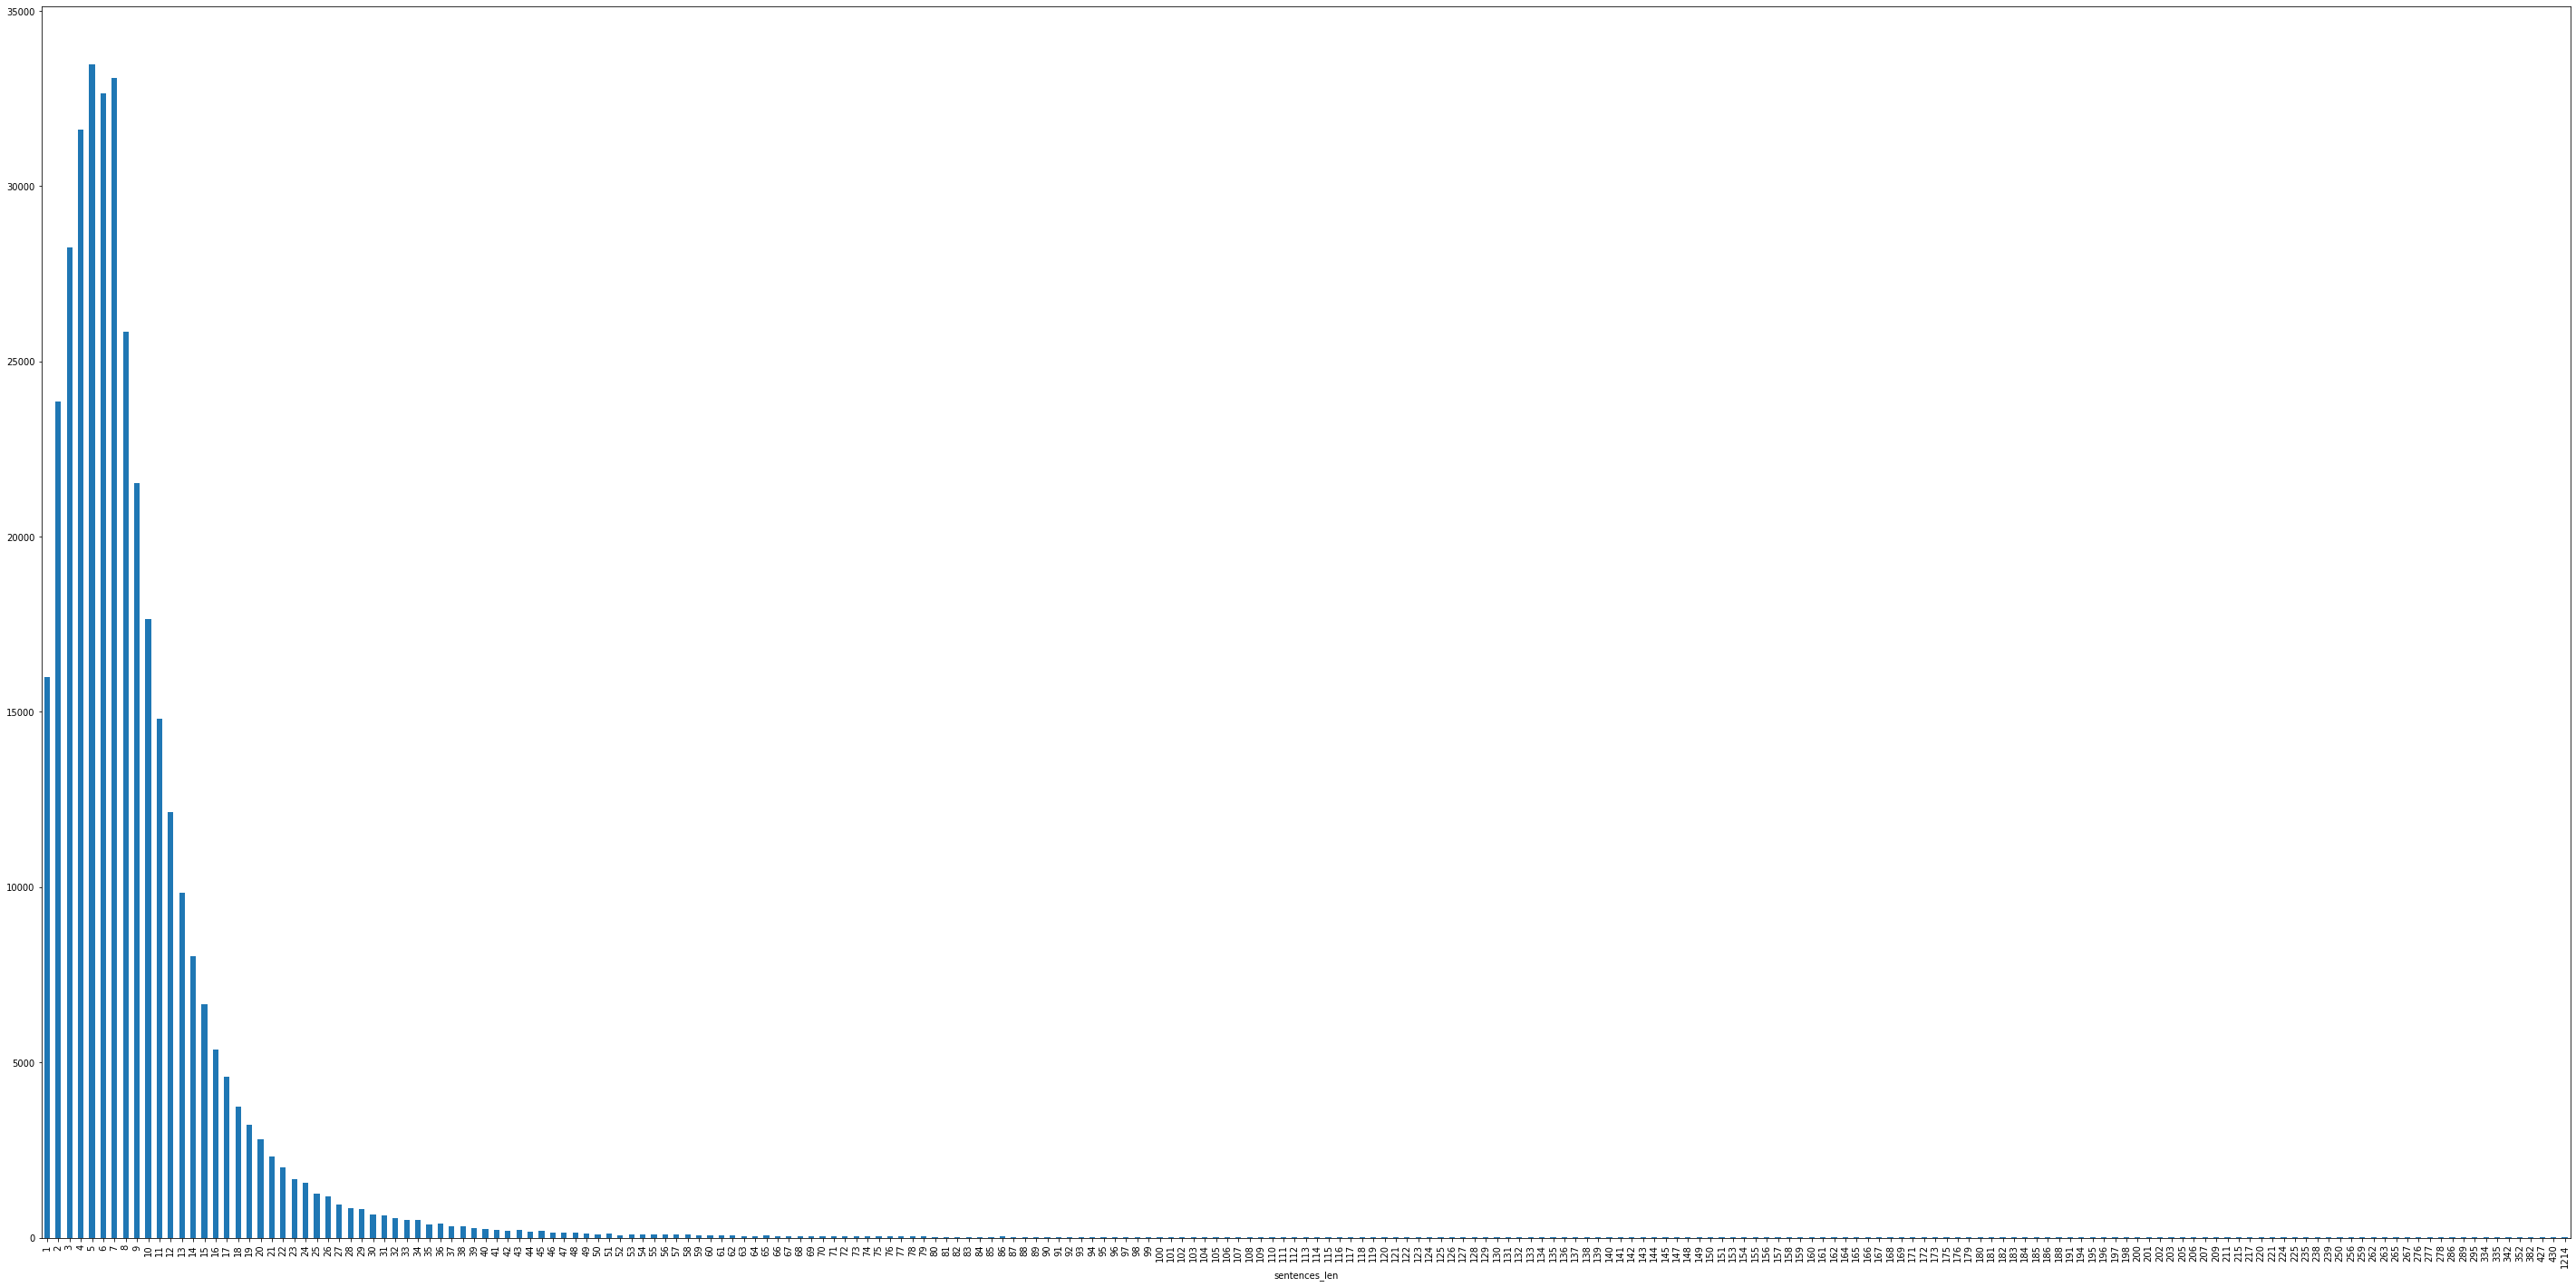

In [ ]:
sentences_len_list = [len(s.split()) for s in sentences_list]
sentences_len_list

temp_df = pd.DataFrame({
    'sentences_len': sentences_len_list
    })


temp_df.groupby(['sentences_len']).size().plot(kind = "bar", figsize = (50,25))

# hist = temp_df.hist(bins=3)

In [ ]:
# encoded_sentence

In [ ]:
max_len=128
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

padded_encoded_sentences = pad_sequences(
    maxlen=max_len
    , sequences=encoded_sentence
    , padding="post"
    , value=0
)
padded_encoded_labels = pad_sequences(
    maxlen=max_len
    , sequences=encoded_labels
    , padding="post"
    , value=labels_map['O']
)

print("Shape of Encoded Sentence ",padded_encoded_sentences.shape)
print("Shape of Encoded Labels ",padded_encoded_labels.shape)

print("First Encoded Sentence Without Padding ",encoded_sentence[0])
print("First Encoded Sentence with padding ",padded_encoded_sentences[0])
print("First Sentence Encoded Label without Padding ",encoded_labels[0])
print("First Sentence Encoded Label with Padding ",padded_encoded_labels[0])

Shape of Encoded Sentence  (356513, 128)
Shape of Encoded Labels  (356513, 128)
First Encoded Sentence Without Padding  [3261, 28, 9, 204, 258, 227, 49]
First Encoded Sentence with padding  [3261   28    9  204  258  227   49    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
First Sentence Encoded Label without Padding  [0, 6, 0, 0, 0, 0, 0]
First Sentence Encoded Label with Padding  [0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [ ]:
target = [to_categorical(i, num_classes = num_labels) for i in  padded_encoded_labels]
print("Shape of Labels  after converting to Categorical for first sentence ", target[0].shape)

Shape of Labels  after converting to Categorical for first sentence  (128, 20)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val_test, y_train, y_val_test = train_test_split(
    padded_encoded_sentences
    , target
    , test_size = 0.3
    , random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_val_test
    , y_val_test
    , test_size = 0.2
    , random_state=42
)

print("Input Train Data Shape : ", X_train.shape)
print("Train Labels Length : ", len(y_train))
print("Input Test Data Shape : ", X_test.shape)
print("Test Labels Length : ", len(y_test))

print("Input Validation Data Shape : ", X_val.shape)
print("Validation Labels Length : ", len(y_val))

Input Train Data Shape :  (249559, 128)
Train Labels Length :  249559
Input Test Data Shape :  (21391, 128)
Test Labels Length :  21391
Input Validation Data Shape :  (85563, 128)
Validation Labels Length :  85563


In [ ]:
#print("First Sentence in Training Data ",X_train[0])
#print("First sentence Label ",y_train[0])
print("Shape of First Sentence -Train", X_train[0].shape)
print("Shape of First Sentence Label  -Train", y_train[0].shape)

Shape of First Sentence -Train (128,)
Shape of First Sentence Label  -Train (128, 20)


In [ ]:
from tensorflow.keras import Model,Input
from tensorflow.keras.layers import LSTM,Embedding,Dense
from tensorflow.keras.layers import TimeDistributed, SpatialDropout1D,Bidirectional

In [ ]:
embedding_dim = 128
vocab_size = len(tokeniser.word_index)+1
lstm_units = 128
max_len = 128

input_word = Input(shape = (max_len,))

model = Embedding(
    input_dim = vocab_size+1
    , output_dim = embedding_dim
    , input_length = max_len
)(input_word)

model = LSTM(
    units = embedding_dim
    , return_sequences = True
)(model)

out = TimeDistributed(Dense(num_labels, activation = 'softmax'))(model)
model = Model(input_word, out)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128)]             0         
                                                                 
 embedding (Embedding)       (None, 128, 128)          9314048   
                                                                 
 lstm (LSTM)                 (None, 128, 128)          131584    
                                                                 
 time_distributed (TimeDistr  (None, 128, 20)          2580      
 ibuted)                                                         
                                                                 
Total params: 9,448,212
Trainable params: 9,448,212
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(
    X_train
    , np.array(y_train)
    , validation_data=(X_val, np.array(y_val))
    , batch_size = 4
    , epochs = 10
)

Epoch 1/10
62390/62390 [==============================] - 773s 12ms/step - loss: 0.0082 - accuracy: 0.9984 - val_loss: 0.0057 - val_accuracy: 0.9986
Epoch 2/10
62390/62390 [==============================] - 765s 12ms/step - loss: 0.0045 - accuracy: 0.9990 - val_loss: 0.0056 - val_accuracy: 0.9986
Epoch 3/10
62390/62390 [==============================] - 762s 12ms/step - loss: 0.0040 - accuracy: 0.9991 - val_loss: 0.0056 - val_accuracy: 0.9986
Epoch 4/10
62390/62390 [==============================] - 758s 12ms/step - loss: 0.0038 - accuracy: 0.9992 - val_loss: 0.0058 - val_accuracy: 0.9986
Epoch 5/10
62390/62390 [==============================] - 755s 12ms/step - loss: 0.0036 - accuracy: 0.9992 - val_loss: 0.0059 - val_accuracy: 0.9985
Epoch 6/10
62390/62390 [==============================] - 756s 12ms/step - loss: 0.0034 - accuracy: 0.9992 - val_loss: 0.0060 - val_accuracy: 0.9986
Epoch 7/10
62390/62390 [==============================] - 757s 12ms/step - loss: 0.0033 - accuracy: 0.9993

In [ ]:
model.save("/content/drive/MyDrive/MODEL/cp2")

In [ ]:
preds = model.predict(X_test)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128)]             0         
                                                                 
 embedding (Embedding)       (None, 128, 128)          9314048   
                                                                 
 lstm (LSTM)                 (None, 128, 128)          131584    
                                                                 
 time_distributed (TimeDistr  (None, 128, 20)          2580      
 ibuted)                                                         
                                                                 
Total params: 9,448,212
Trainable params: 9,448,212
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def evaluatePredictions(test_data,preds, actual_preds):
    print("Shape of Test Data Array",test_data.shape)
    
    y_actual = np.argmax(np.array(actual_preds),axis=2)
    y_pred = np.argmax(preds,axis=2)
    num_test_data = test_data.shape[0]
    
    print("Number of Test Data Points ",num_test_data)

    data=pd.DataFrame()

    df_list = []
    for i in range(num_test_data):
        test_str = list(test_data[i])

        df = pd.DataFrame()
        df['test_tokens'] = test_str
        df['tokens'] = df['test_tokens'].apply(lambda x:tokeniser.index_word[x] if x!=0 else '<PAD>')
        df['actual_target_index'] = list(y_actual[i])
        df['pred_target_index'] = list(y_pred[i])
        df['actual_target_label'] = df['actual_target_index'].apply(lambda x: reverse_label_map[x])
        df['pred_target_label'] = df['pred_target_index'].apply(lambda x: reverse_label_map[x])
        df['id'] = i+1
        df_list.append(df)

    data = pd.concat(df_list)
    pred_data = data[data['tokens']!='<PAD>']
    accuracy = pred_data[pred_data['actual_target_label'] == pred_data['pred_target_label']].shape[0] / pred_data.shape[0]
    
    
    return pred_data, accuracy

In [ ]:
pred_data, accuracy = evaluatePredictions(X_test, preds, y_test)

Shape of Test Data Array (21391, 128)
Number of Test Data Points  21391


In [ ]:
y_pred = pred_data['pred_target_label'].tolist()
y_actual = pred_data['actual_target_label'].tolist()

In [ ]:
# y_pred = pred_data['pred_target_label']
# y_actual = pred_data['actual_target_label']
# y_pred

In [ ]:
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report

print(classification_report([y_actual], [y_pred]))

              precision    recall  f1-score   support

         ATE       0.98      0.97      0.97      2085
     ATERIAL       0.68      0.38      0.49       124
         ERM       0.80      0.73      0.76       738
       ERSON       0.74      0.65      0.69      2741
       HEORY       0.90      0.53      0.67        17
         IME       0.97      0.97      0.97       959
      ISEASE       0.91      0.87      0.89        82
         ITY       1.00      0.95      0.97       100
 IVILIZATION       0.87      0.83      0.85      2877
        LANT       0.69      0.57      0.62       222
       NIMAL       0.86      0.81      0.83      1228
     OCATION       0.73      0.57      0.64       167
      OUNTRY       0.95      0.98      0.96        41
     RTIFACT       0.59      0.49      0.53       485
  TUDY_FIELD       0.59      0.49      0.54        84
     UANTITY       0.76      0.64      0.69       502
        VENT       0.82      0.41      0.55        22

   micro avg       0.85   

## 테스트 추론

In [ ]:
import tensorflow as tf

# 토크나이저 가져오기
with open("/content/drive/MyDrive/DATA/cp2/tokenizer.json", "r", encoding='utf-8') as fp:
    _tokenizer = tf.keras.preprocessing.text.tokenizer_from_json(
        fp.read()
    )

print(_tokenizer)

# 라벨 사전 가져오기
with open("/content/drive/MyDrive/DATA/cp2/labels.json", "r") as fp:
    _reverse_label_map = {v: k for k, v in json.load(fp).items()}

print(_reverse_label_map)

{0: 'O', 1: 'ARTIFACT', 2: 'ANIMAL', 3: 'MATERIAL', 4: 'PLANT', 5: 'ORGANIZATION', 6: 'DATE', 7: 'COUNTRY', 8: 'DISEASE', 9: 'CIVILIZATION', 10: 'TIME', 11: 'OCCUPATION', 12: 'PERSON', 13: 'STUDY_FIELD', 14: 'TERM', 15: 'THEORY', 16: 'EVENT', 17: 'QUANTITY', 18: 'CITY', 19: 'LOCATION'}


In [ ]:
import re
from pororo import Pororo
from kiwipiepy import Kiwi
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# VARIABLES
max_len=128
spc_chr_pattern = r"[-()\"#/@;:<>{}`+=~|.!?,\*_【&]"

_kwd_extractor = {
    "ko": Pororo(task="ner", lang="ko")
    # , "en": Pororo(task="ner", lang="en")
    # , "ja": Pororo(task="ner", lang="ja")
}

kiwi = Kiwi(num_workers=4)
# _t = Twitter()

In [ ]:
# FUNCTIONS
def preproc_data_for_train(_trg_str: str):
    _result = ""

    try:
        # _lang_cls = langid.classify(_trg_str)
        # _kwds_res = _kwd_extractor[_lang_cls[0]](_trg_str)
        _kwds_res = _kwd_extractor["ko"](_trg_str)
        return ' '.join([_label for _word, _label in _kwds_res if _word.strip()])
    except:
        return _result

def remove_special_n_emoji(_trg_str: str):
    _res = demoji.replace(" ".join(_trg_str.split()), " ")
    _res = re.sub(spc_chr_pattern, " ", _res)
    return ' '.join(_res.split())
    
def conv_pos_text(_trg_str: str):
    # return ' '.join([w for w, _ in _t.pos(_trg_str, norm=True) if _ == 'Noun'])
    return ' '.join([w for w, _ in _t.pos(_trg_str, norm=True)])

In [ ]:
def infer_kwd_extractor_single(_model, _tokenizer, _trg_str):
    _res = {}

    _trg_str = remove_special_n_emoji(_trg_str)
    _trg_str = kiwi.analyze(_trg_str)[0][0]
    _trg_str = [_.form for _ in _trg_str]
    _res["pos_text"] = _trg_str
    _len = len(_res["pos_text"])
    
    _trg_str = _tokenizer.texts_to_sequences([' '.join(_trg_str)])
    _preds = _model.predict(
        pad_sequences(
            maxlen=max_len
            , sequences=_trg_str
            , padding="post"
            , value=0
        )
    )
    
    _res["result"] = [_reverse_label_map[_] for _ in np.argmax(_preds, axis=2)[0]]

    if _len < len(_res["result"]):
        _res["result"] = _res["result"][:_len]
    
    return _res

In [ ]:
# 낱개 추론시
test_message = "위칭이도 먹고시푼데"
# model.predict()
_result = infer_kwd_extractor_single(model, _tokenizer, test_message)
print(_result)

{'pos_text': ['위칭', '이', '도', '먹', '고', '시', '풀', 'ᆫ', '데'], 'result': ['PERSON', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']}


In [ ]:
trg_df = pd.read_csv("/content/drive/MyDrive/DATA/cp2/df_final.csv")
trg_df = trg_df[(trg_df['type'] == 'MESG')]

trg_df = trg_df[['channel_name_x',	'sender_nickname',	'message',	'id type',	'created_at']]

trg_df["message"] = trg_df["message"].apply(lambda x: remove_special_n_emoji(x))

trg_df["message_length"] = trg_df["message"].apply(lambda x: len(x.split()))

trg_df = trg_df[(trg_df["message_length"] > 0)]

trg_df = trg_df[(~trg_df["message"].str.startswith("Img"))]

trg_df.reset_index(drop=True, inplace=True)

trg_df

,channel_name_x,sender_nickname,message,id type,created_at,message_length
0,김위칭,위칭,으어~ 오늘도 재밌엉ㅎ습니다,celeb,2022-02-27 01:03:05,3
1,김위칭,위칭,"@,@",celeb,2022-02-27 01:03:06,1
2,김위칭,위칭,요즘 계속 업뎃중이라 토큰이 자꾸 만료되네요ㅋㅋ,celeb,2022-03-01 13:43:28,6
3,김위칭,위칭,ㅋㅋㅋㅋ,celeb,2022-03-01 22:03:24,1
4,김위칭,위칭,다들 맛난거 드시네요,celeb,2022-03-01 22:03:37,3
5,김위칭,위칭,위칭이도 먹고시푼데,celeb,2022-03-02 23:05:11,2
6,김위칭,위칭,와 좀 압도적,celeb,2022-03-03 00:14:37,3
7,김위칭,위칭,이딴걸 먹으라니..,celeb,2022-03-03 00:14:51,2
8,김위칭,위칭,뀨?,celeb,2022-03-05 23:19:21,1
9,김위칭,위칭,악 귀여워라,celeb,2022-03-06 01:05:39,2


In [ ]:
def infer_kwd_extractor_single(_model, _tokenizer, _trg_str):
    _res = {}

    _trg_str = remove_special_n_emoji(_trg_str)
    _trg_str = kiwi.analyze(_trg_str)[0][0]
    _trg_str = [_.form for _ in _trg_str]
    _res["pos_text"] = _trg_str
    _len = len(_res["pos_text"])
    
    _trg_str = _tokenizer.texts_to_sequences([' '.join(_trg_str)])
    _preds = _model.predict(
        pad_sequences(
            maxlen=max_len
            , sequences=_trg_str
            , padding="post"
            , value=0
        )
    )
    
    _res["result"] = [_reverse_label_map[_] for _ in np.argmax(_preds, axis=2)[0]]

    if _len < len(_res["result"]):
        _res["result"] = _res["result"][:_len]
    
    return _res

In [ ]:
def kiwi_analyze_bulk(_text_list):
    _res = []
    for _pos in kiwi.analyze(_text_list):
        _ea_res = []
        for _ea_token in _pos[0][0]:
            _ea_res.append(_ea_token.form)

        _res.append(_ea_res)
    
    return _res

trg_df["message_pos"] = kiwi_analyze_bulk(trg_df["message"].tolist())

trg_df

,channel_name_x,sender_nickname,message,id type,created_at,message_length,message_pos
0,김위칭,위칭,으어~ 오늘도 재밌엉ㅎ습니다,celeb,2022-02-27 01:03:05,3,"[으어, ~, 오늘, 도, 재밌, 엉, ㅎ, 습니다]"
1,김위칭,위칭,"@,@",celeb,2022-02-27 01:03:06,1,"[@, ,, @]"
2,김위칭,위칭,요즘 계속 업뎃중이라 토큰이 자꾸 만료되네요ㅋㅋ,celeb,2022-03-01 13:43:28,6,"[요즘, 계속, 업뎃, 중, 이, 라, 토큰, 이, 자꾸, 만료, 되, 네요, ㅋㅋ]"
3,김위칭,위칭,ㅋㅋㅋㅋ,celeb,2022-03-01 22:03:24,1,[ㅋㅋㅋㅋ]
4,김위칭,위칭,다들 맛난거 드시네요,celeb,2022-03-01 22:03:37,3,"[다, 들, 맛나, ᆫ, 거, 들, 시, 네요]"
5,김위칭,위칭,위칭이도 먹고시푼데,celeb,2022-03-02 23:05:11,2,"[위칭, 이, 도, 먹, 고, 시, 풀, ᆫ, 데]"
6,김위칭,위칭,와 좀 압도적,celeb,2022-03-03 00:14:37,3,"[와, 좀, 압도, 적]"
7,김위칭,위칭,이딴걸 먹으라니..,celeb,2022-03-03 00:14:51,2,"[이, 딴, 거, ᆯ, 먹, 으라, 니, ..]"
8,김위칭,위칭,뀨?,celeb,2022-03-05 23:19:21,1,"[뀨, ?]"
9,김위칭,위칭,악 귀여워라,celeb,2022-03-06 01:05:39,2,"[악, 귀엽, 어라]"


In [ ]:
trg_df["message_pos"] = trg_df["message_pos"].apply(lambda x: ' '.join(x))
trg_df["message_vec"] = _tokenizer.texts_to_sequences(trg_df["message_pos"].tolist())
trg_df

,channel_name_x,sender_nickname,message,id type,created_at,message_length,message_pos,message_vec
0,김위칭,위칭,으어~ 오늘도 재밌엉ㅎ습니다,celeb,2022-02-27 01:03:05,3,으어 ~ 오늘 도 재밌 엉 ㅎ 습니다,"[3261, 28, 9, 204, 258, 227, 49]"
1,김위칭,위칭,"@,@",celeb,2022-02-27 01:03:06,1,"@ , @",[]
2,김위칭,위칭,요즘 계속 업뎃중이라 토큰이 자꾸 만료되네요ㅋㅋ,celeb,2022-03-01 13:43:28,6,요즘 계속 업뎃 중 이 라 토큰 이 자꾸 만료 되 네요 ㅋㅋ,"[254, 365, 3816, 114, 2, 85, 5230, 2, 535, 435..."
3,김위칭,위칭,ㅋㅋㅋㅋ,celeb,2022-03-01 22:03:24,1,ㅋㅋㅋㅋ,[83]
4,김위칭,위칭,다들 맛난거 드시네요,celeb,2022-03-01 22:03:37,3,다 들 맛나 ᆫ 거 들 시 네요,"[20, 31, 320, 7, 12, 31, 18, 48]"
5,김위칭,위칭,위칭이도 먹고시푼데,celeb,2022-03-02 23:05:11,2,위칭 이 도 먹 고 시 풀 ᆫ 데,"[748, 2, 9, 29, 8, 18, 508, 7, 47]"
6,김위칭,위칭,와 좀 압도적,celeb,2022-03-03 00:14:37,3,와 좀 압도 적,"[151, 72, 5075, 159]"
7,김위칭,위칭,이딴걸 먹으라니..,celeb,2022-03-03 00:14:51,2,이 딴 거 ᆯ 먹 으라 니 ..,"[2, 991, 12, 15, 29, 3147, 122]"
8,김위칭,위칭,뀨?,celeb,2022-03-05 23:19:21,1,뀨 ?,[3004]
9,김위칭,위칭,악 귀여워라,celeb,2022-03-06 01:05:39,2,악 귀엽 어라,"[1060, 129, 290]"


In [ ]:
trg_df = trg_df[(trg_df["message_length"] > 1)]

In [ ]:
_total_preds = None

def chunker(seq, size):
    return (seq[pos:pos + size] for pos in range(0, len(seq), size))

for group in chunker(trg_df["message_vec"].tolist(), 1000):
    _preds = model.predict(
        pad_sequences(
            maxlen=max_len
            , sequences=group
            , padding="post"
            , value=0
        )
    )
    if _total_preds is None:
        _total_preds = _preds
    else:
        _total_preds = np.concatenate((_total_preds, _preds))

    print(_total_preds.shape)

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000


array([[[9.9705124e-01, 1.0235517e-04, 1.3164214e-04, ...,
         1.1077599e-08, 3.9232584e-10, 1.9409152e-04],
        [6.4281625e-04, 5.2255831e-07, 1.7439261e-07, ...,
         5.1188351e-07, 1.9564629e-08, 2.0292764e-06],
        [9.9956185e-01, 1.5849691e-06, 7.2303024e-05, ...,
         5.3181152e-06, 1.9764206e-13, 1.1655586e-04],
        ...,
        [1.0000000e+00, 1.5731879e-11, 4.0672032e-12, ...,
         2.3153625e-13, 2.4814542e-21, 6.4197297e-13],
        [1.0000000e+00, 1.5541780e-11, 4.0530318e-12, ...,
         2.3078761e-13, 2.4558118e-21, 6.3528572e-13],
        [1.0000000e+00, 1.5354678e-11, 4.0392021e-12, ...,
         2.3004046e-13, 2.4304620e-21, 6.2869696e-13]],

       [[9.9806935e-01, 2.8973664e-04, 3.0890973e-05, ...,
         1.2710790e-07, 4.8421618e-12, 1.9757720e-04],
        [9.9995899e-01, 1.2747613e-07, 8.4411085e-06, ...,
         8.8600437e-08, 1.4528408e-15, 1.5580737e-07],
        [9.9759763e-01, 1.1867723e-05, 1.1018429e-05, ...,
         1.418

In [ ]:
_res = []
for _ in np.argmax(_total_preds, axis=2):
    _ea_res = []
    for __ in _:
        _ea_res.append(_reverse_label_map[__])
    
    _res.append(_ea_res)
    
trg_df["pred_result"] = _res
del _res

In [ ]:
trg_df.to_csv('/content/drive/MyDrive/DATA/cp2/result_ner_inference.20221011.csv', index=False)

In [ ]:
import pandas as pd
import numpy as np
import ast
import json

pd.set_option('display.min_rows', 100)
pd.set_option('display.max_columns', 100)

In [ ]:
trg_df = pd.read_csv('/content/drive/MyDrive/DATA/cp2/result_ner_inference.20221011.csv')
trg_df['message_vec'] = trg_df['message_vec'].apply(lambda x: ast.literal_eval(x))
trg_df['pred_result'] = trg_df['pred_result'].apply(lambda x: ast.literal_eval(x))
trg_df

,channel_name_x,sender_nickname,message,id type,created_at,message_length,message_pos,message_vec,pred_result
0,김위칭,위칭,으어~ 오늘도 재밌엉ㅎ습니다,celeb,2022-02-27 01:03:05,3,으어 ~ 오늘 도 재밌 엉 ㅎ 습니다,"[3261, 28, 9, 204, 258, 227, 49]","[O, DATE, O, O, O, O, O, O, O, O, O, O, O, O, ..."
1,김위칭,위칭,요즘 계속 업뎃중이라 토큰이 자꾸 만료되네요ㅋㅋ,celeb,2022-03-01 13:43:28,6,요즘 계속 업뎃 중 이 라 토큰 이 자꾸 만료 되 네요 ㅋㅋ,"[254, 365, 3816, 114, 2, 85, 5230, 2, 535, 435...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
2,김위칭,위칭,다들 맛난거 드시네요,celeb,2022-03-01 22:03:37,3,다 들 맛나 ᆫ 거 들 시 네요,"[20, 31, 320, 7, 12, 31, 18, 48]","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
3,김위칭,위칭,위칭이도 먹고시푼데,celeb,2022-03-02 23:05:11,2,위칭 이 도 먹 고 시 풀 ᆫ 데,"[748, 2, 9, 29, 8, 18, 508, 7, 47]","[PERSON, O, O, O, O, O, O, O, O, O, O, O, O, O..."
4,김위칭,위칭,와 좀 압도적,celeb,2022-03-03 00:14:37,3,와 좀 압도 적,"[151, 72, 5075, 159]","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
5,김위칭,위칭,이딴걸 먹으라니..,celeb,2022-03-03 00:14:51,2,이 딴 거 ᆯ 먹 으라 니 ..,"[2, 991, 12, 15, 29, 3147, 122]","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
6,김위칭,위칭,악 귀여워라,celeb,2022-03-06 01:05:39,2,악 귀엽 어라,"[1060, 129, 290]","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
7,김위칭,위칭,헐 전 콘치 좋은디!!,celeb,2022-03-06 01:05:57,4,헐 저 ᆫ 콘치 좋 은 디 !!,"[398, 36, 7, 29951, 37, 11, 663]","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
8,김위칭,위칭,윽 화장품때문에 얼굴다뒤집ㅜㅜ 속상쓰에요,celeb,2022-03-10 00:32:43,4,윽 화장품 때문 에 얼굴 다 뒤집 ㅜㅜ 속 상 쓰 에요,"[5685, 5686, 369, 16, 576, 20, 4865, 274, 410,...","[O, O, O, O, ANIMAL, O, O, O, O, O, O, O, O, O..."
9,김위칭,위칭,우선 세수해서 씻어냈어요ㅜㅜ,celeb,2022-03-10 00:33:45,3,우선 세수 하 어서 씻 어 내 었 어요 ㅜㅜ,"[1438, 3029, 1, 19, 525, 3, 207, 4, 6, 274]","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."


In [ ]:
def get_pred_keywords(_df):
    _res = [{"index": i, "label": _} for i, _ in enumerate(_df["pred_result"]) if _ != "O"]

    for i, _ in enumerate(_res):
        # _temp1 = 
        # print(_temp1, type(_temp1))
        # _temp2 = 
        # print(_temp2, type(_temp2))
        _res[i]["keyword"] = _tokenizer.index_word[_df["message_vec"][_["index"]]]

    return _res

trg_df['pred_keywords'] = trg_df.apply(lambda x: get_pred_keywords(x), axis=1)

In [ ]:
trg_df['pred_keywords'] = trg_df['pred_keywords'].apply 

,channel_name_x,sender_nickname,message,id type,created_at,message_length,message_pos,message_vec,pred_result,pred_keywords
0,김위칭,위칭,으어~ 오늘도 재밌엉ㅎ습니다,celeb,2022-02-27 01:03:05,3,으어 ~ 오늘 도 재밌 엉 ㅎ 습니다,"[3261, 28, 9, 204, 258, 227, 49]","[O, DATE, O, O, O, O, O, O, O, O, O, O, O, O, ...","[{'index': 1, 'label': 'DATE', 'keyword': '오늘'}]"
1,김위칭,위칭,요즘 계속 업뎃중이라 토큰이 자꾸 만료되네요ㅋㅋ,celeb,2022-03-01 13:43:28,6,요즘 계속 업뎃 중 이 라 토큰 이 자꾸 만료 되 네요 ㅋㅋ,"[254, 365, 3816, 114, 2, 85, 5230, 2, 535, 435...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",[]
2,김위칭,위칭,다들 맛난거 드시네요,celeb,2022-03-01 22:03:37,3,다 들 맛나 ᆫ 거 들 시 네요,"[20, 31, 320, 7, 12, 31, 18, 48]","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",[]
3,김위칭,위칭,위칭이도 먹고시푼데,celeb,2022-03-02 23:05:11,2,위칭 이 도 먹 고 시 풀 ᆫ 데,"[748, 2, 9, 29, 8, 18, 508, 7, 47]","[PERSON, O, O, O, O, O, O, O, O, O, O, O, O, O...","[{'index': 0, 'label': 'PERSON', 'keyword': '위..."
4,김위칭,위칭,와 좀 압도적,celeb,2022-03-03 00:14:37,3,와 좀 압도 적,"[151, 72, 5075, 159]","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",[]
5,김위칭,위칭,이딴걸 먹으라니..,celeb,2022-03-03 00:14:51,2,이 딴 거 ᆯ 먹 으라 니 ..,"[2, 991, 12, 15, 29, 3147, 122]","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",[]
6,김위칭,위칭,악 귀여워라,celeb,2022-03-06 01:05:39,2,악 귀엽 어라,"[1060, 129, 290]","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",[]
7,김위칭,위칭,헐 전 콘치 좋은디!!,celeb,2022-03-06 01:05:57,4,헐 저 ᆫ 콘치 좋 은 디 !!,"[398, 36, 7, 29951, 37, 11, 663]","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",[]
8,김위칭,위칭,윽 화장품때문에 얼굴다뒤집ㅜㅜ 속상쓰에요,celeb,2022-03-10 00:32:43,4,윽 화장품 때문 에 얼굴 다 뒤집 ㅜㅜ 속 상 쓰 에요,"[5685, 5686, 369, 16, 576, 20, 4865, 274, 410,...","[O, O, O, O, ANIMAL, O, O, O, O, O, O, O, O, O...","[{'index': 4, 'label': 'ANIMAL', 'keyword': '얼..."
9,김위칭,위칭,우선 세수해서 씻어냈어요ㅜㅜ,celeb,2022-03-10 00:33:45,3,우선 세수 하 어서 씻 어 내 었 어요 ㅜㅜ,"[1438, 3029, 1, 19, 525, 3, 207, 4, 6, 274]","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",[]


In [ ]:
trg_df

,channel_name_x,sender_nickname,message,id type,created_at,message_length,message_pos,message_vec,pred_result,pred_keywords
0,김위칭,위칭,으어~ 오늘도 재밌엉ㅎ습니다,celeb,2022-02-27 01:03:05,3,으어 ~ 오늘 도 재밌 엉 ㅎ 습니다,"[3261, 28, 9, 204, 258, 227, 49]","[O, DATE, O, O, O, O, O, O, O, O, O, O, O, O, ...","[{'index': 1, 'label': 'DATE', 'keyword': '오늘'}]"
1,김위칭,위칭,요즘 계속 업뎃중이라 토큰이 자꾸 만료되네요ㅋㅋ,celeb,2022-03-01 13:43:28,6,요즘 계속 업뎃 중 이 라 토큰 이 자꾸 만료 되 네요 ㅋㅋ,"[254, 365, 3816, 114, 2, 85, 5230, 2, 535, 435...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",[]
2,김위칭,위칭,다들 맛난거 드시네요,celeb,2022-03-01 22:03:37,3,다 들 맛나 ᆫ 거 들 시 네요,"[20, 31, 320, 7, 12, 31, 18, 48]","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",[]
3,김위칭,위칭,위칭이도 먹고시푼데,celeb,2022-03-02 23:05:11,2,위칭 이 도 먹 고 시 풀 ᆫ 데,"[748, 2, 9, 29, 8, 18, 508, 7, 47]","[PERSON, O, O, O, O, O, O, O, O, O, O, O, O, O...","[{'index': 0, 'label': 'PERSON', 'keyword': '위..."
4,김위칭,위칭,와 좀 압도적,celeb,2022-03-03 00:14:37,3,와 좀 압도 적,"[151, 72, 5075, 159]","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",[]
5,김위칭,위칭,이딴걸 먹으라니..,celeb,2022-03-03 00:14:51,2,이 딴 거 ᆯ 먹 으라 니 ..,"[2, 991, 12, 15, 29, 3147, 122]","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",[]
6,김위칭,위칭,악 귀여워라,celeb,2022-03-06 01:05:39,2,악 귀엽 어라,"[1060, 129, 290]","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",[]
7,김위칭,위칭,헐 전 콘치 좋은디!!,celeb,2022-03-06 01:05:57,4,헐 저 ᆫ 콘치 좋 은 디 !!,"[398, 36, 7, 29951, 37, 11, 663]","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",[]
8,김위칭,위칭,윽 화장품때문에 얼굴다뒤집ㅜㅜ 속상쓰에요,celeb,2022-03-10 00:32:43,4,윽 화장품 때문 에 얼굴 다 뒤집 ㅜㅜ 속 상 쓰 에요,"[5685, 5686, 369, 16, 576, 20, 4865, 274, 410,...","[O, O, O, O, ANIMAL, O, O, O, O, O, O, O, O, O...","[{'index': 4, 'label': 'ANIMAL', 'keyword': '얼..."
9,김위칭,위칭,우선 세수해서 씻어냈어요ㅜㅜ,celeb,2022-03-10 00:33:45,3,우선 세수 하 어서 씻 어 내 었 어요 ㅜㅜ,"[1438, 3029, 1, 19, 525, 3, 207, 4, 6, 274]","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",[]


In [ ]:
# 전체 워드 클라우드

In [ ]:
# 셀럽 별로 키워드 추출

In [ ]:
trg_df.to_csv('/content/drive/MyDrive/DATA/cp2/result_final.csv', index=False)

In [ ]:
# 스포츠 -> 키워드 , 여성 -> 키워드


trg_df['pred_keywords'] = 

SyntaxError: ignored